In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [29]:
def imgshape(x):
    new = np.zeros((32,32,3))
    for c in range(3):
        for i in range(32):
            for j in range(32):
                new[i][j][c] = x[c][i][j]
    return new

In [34]:
exps = ['baseline','EVEM','EVEM_bm','EVEM_bm_cf10','sgld1']

In [48]:
res = {}
for exp in exps:
    print(exp)
    adv = np.load(f'./{exp}/adv_l2/adversarials_batch_0.npy',allow_pickle=True)
    norm = np.linalg.norm

    for pk in adv:
        if(type(pk)==str): continue
        #f, axs = plt.subplots(1,2, sharey=True)
        l2dist = norm((pk[2]-pk[0]).flatten()*255,2)
        #for idx, ax in enumerate(axs):
        #    amg = pk[(idx)*2]
        #    img = imgshape(amg)
        #    ax.imshow(img)
        #    ax.set_title(['Org','Adv'][idx])
        #f.suptitle(f'Experiment: {exp}\nDistance: {pk[4]._value}\nL2norm: {l2dist}',ha='center',va='top')
        #f.show()
        
    dists=[]
    for pk in adv:
        if(type(pk)==str): continue
        l2dist = norm((pk[2]-pk[0]).flatten()*255,2)
        dists.append(l2dist)
    res[f'dists{exp}'] = dists.copy()

    x=np.arange(0,300,1)
    lims = []
    for i in x:
        lims.append(sum(dists>i)/len(dists))
    res[f'lims{exp}'] = lims.copy()

baseline
EVEM
EVEM_bm
EVEM_bm_cf10
sgld1


/usr/local/anaconda3/envs/JEM/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


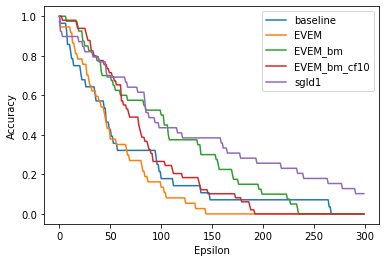

In [49]:
f = plt.figure()
for exp in exps:
    ax = plt.gca()
    ax.plot(x,res[f'lims{exp}'], label=exp)
    #ax.plot(x,lims,label='EVEM_bm')
    #ax.plot(x,lims2,label='EVEM')
    #ax.plot(x,lims3,label='SGLD')
    #ax.plot(x,lims4_cf10,label='EVEM_bm_cifar10')
    #ax.plot(x,lims5bl, label='Baseline')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epsilon')
ax.legend()
f.show()

In [147]:
limsbm=lims
limsevem=lims2
limssgld=lims3

In [149]:
sd = {"limsbm": limsbm, "limsevem": limsevem, "limssgld": limssgld, "limscf10": lims4_cf10, "limsbl": lims5bl}

In [151]:
import pickle

with open("epsilons_18_3_2022.pkl","wb") as of:
    pickle.dump(sd, of)